Name: Mariam Valladares

Labpartner(s): Sharmin Saddik

In [230]:
#import statements go here
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Class 12.2

# Warmup 12.2

Kelsey and Asante are going to demo ARC PRO and give you some exercises.

# Lecture 12.2

### Announcements

- Reminder **Reminder all labs through 9.2 need to be completed, or resubmitted if you did not get a satisfactory grade, by end of the day Friday 11/15 to pass the course.** The understanding of this beginning material is needed to complete this course. If you turned it in or resubmitted one and are waiting for me to grade it, no worries. We can get them all finalized next week. 
  
- We are going to do an advanced lab today. For those of you struggling to catch up, you can not worry about this one and focus on previous labs. See syllabus for grading policy.


### Agenda
- Predator prey modeling. We are going to actually do some scientific modelng today!

## Predator Prey Modeling

See what this lab was based on here: 

https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb

For a more advanced example in predator prey modeling:

https://waterprogramming.wordpress.com/tag/predator-prey/

Modeling the zombie aplocalypse:

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html



###  12.2.1 Lotka-Volterra Equations

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential
equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and
the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

Example: As for population growth: dif Population/dfi Time = Population i(Birth-Deaths)

#### Equations describing the system

 Their populations change with time according to the following pair of equations:

#prey: x is the rate, alphax is the growth, and beta y is the population decay by the predator eaten them.

$ dx/dt = x ( \alpha - \beta y  ) $

#predator: deltaxy is possitive because predator grow when they eat the prey, and gamma relates to the loss term of the predator (death or other eat them). and y is the rate.

$ dy/dt = -y( \gamma - \delta x ) $

Where, $x$ is the number of prey (e.g., phytoplankton), $y$ is the number of predators (e.g., zooplankton). $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$. $\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species. This models makes some assumptions about 
the predator and prey. You can read about them from the Wikipedia page mentioned above.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

1.Rate equation for prey

$dx/dt = \alpha x - \beta x y $

The prey population (x) is presumed to have unlimited supply of food, $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is assumed to be proportional to the rate at which predator and prey encounter each other, given by $ \beta y x$

2.Rate equation for predator

$ dy/dt = \delta x y -\gamma y $

For the predator population (y), $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term $\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

### 12.2.2 Numerical solution using Python

A simple python code for solving these equations is shown below.

In [47]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

We will use the euler method predicts the next step time based on the equation, takes where you are (U) and add the slope dt, and multiplies by the equation f(u)

In [48]:
#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

Define f(u) which will be the predator prey equations

In [49]:
# define the function that represents the Lotka-Volterra equations
# u is the x,y state of the system, what the population is at a given time.
# u = [x,y] on array with both the predetor and prey variables

def f(u):
    """Returns the rate of change of species
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])


In [50]:
# Apply the process to solve the system using the function, parameters set before

#define initial condition and future
# set time-increment and discretize the time
T  = 15.0                           # final time eg 15 years
dt = 0.01                           # set time-increment rate or steps (time increment)
N  = int(T/dt) + 1                  # number of time-steps 

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])


In [51]:
u_euler

array([[10.,  2.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [52]:
#TEST
n= 0
u_euler[n+1] = euler_step(u_euler[n], f, dt)
u_euler

array([[10.  ,  2.  ],
       [ 9.86,  2.12],
       [ 0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ]])

In [53]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [54]:
u_euler

array([[10.        ,  2.        ],
       [ 9.86      ,  2.12      ],
       [ 9.7077616 ,  2.244232  ],
       ...,
       [ 0.87954346,  0.04493602],
       [ 0.88786462,  0.04353381],
       [ 0.89627944,  0.04217898]])

We will now plot the variation of population for each species with time.

In [55]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)  #for 15 years a time array for plotting
x_euler = u_euler[:,0]    #prey
y_euler = u_euler[:,1]    #predator

Text(0.5, 1.0, 'predator prey model')

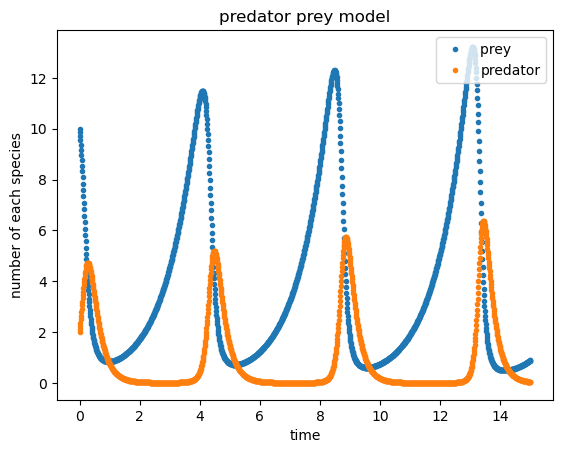

In [56]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

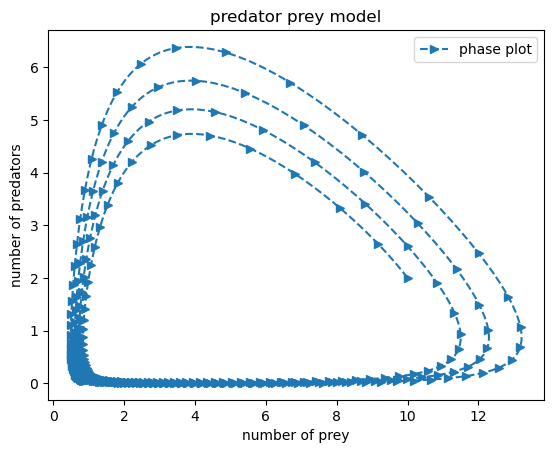

In [57]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Let's think a bit about what this solution means, what is going on here?

**Answer**: The prey initiates with higher population, as more food is available for the predator, predator population
increases, however as food gets depleted predator population decay, given room for prey to grow again. The behaviour repeats.

What happens if we start with different initial conditions? Like more prey and less predators.

In [27]:
#Define different initial conditions

#define initial condition and future
# set time-increment and discretize the time
T  = 15.0                           # final time eg 15 years
dt = 0.01                           # set time-increment rate or steps (time increment)
N  = int(T/dt) + 1                  # number of time-steps 

# initial conditions (initial populations):
x0 = 15. # initial prey amount
y0 = 0.001 # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [28]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [29]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)  #for 15 years a time array for plotting
x_euler = u_euler[:,0]    #prey
y_euler = u_euler[:,1]    #predator

Text(0.5, 1.0, 'predator prey model')

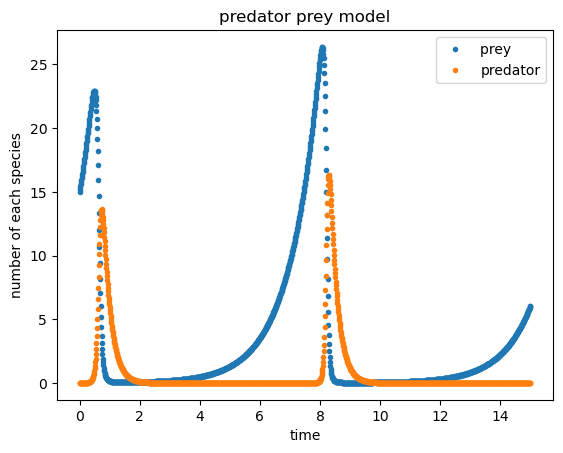

In [30]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

What happened?

**Answer**: Now, the cycle goes slower if the initial number of predator is very small.

What if we start with the same amount of prey and predators?

In [31]:
# initial conditions (initial populations):
x0 = 15. # initial prey amount
y0 = 15 # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [32]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [33]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)  #for 15 years a time array for plotting
x_euler = u_euler[:,0]    #prey
y_euler = u_euler[:,1]    #predator

Text(0.5, 1.0, 'predator prey model')

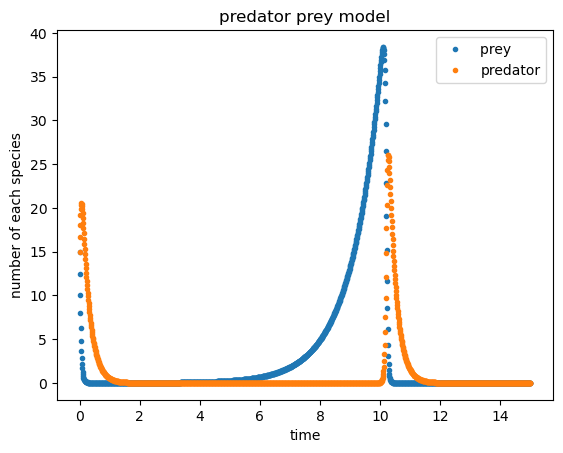

In [34]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

What happened?

**Answer**: It is a similar cycle than before but slower cycles.

Let's mess around with the model parameters. What if the prey grow faster?

In [39]:
# set the parameters
alpha = 10.  ##changing the growth of the prey 
beta = 1.2
gamma = 4.
delta = 1.

In [40]:
# initial conditions (initial populations):
x0 = 5. # initial prey amount
y0 = 5 # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [41]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [42]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)  #for 15 years a time array for plotting
x_euler = u_euler[:,0]    #prey
y_euler = u_euler[:,1]    #predator

Text(0.5, 1.0, 'predator prey model')

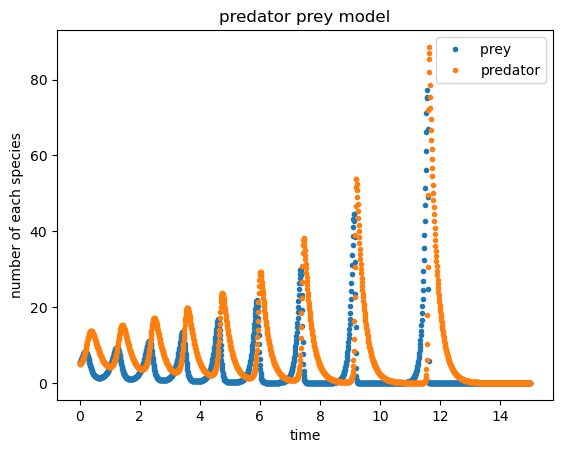

In [43]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

What happened?

**Answer**:The y axis changed when increasing the growth rate of the prey by 10. The growth rate of the prey affected the cycle.

### 12.2.3 System behavior

A better understanding of the system behavior can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

Text(0.5, 1.0, 'predator prey model')

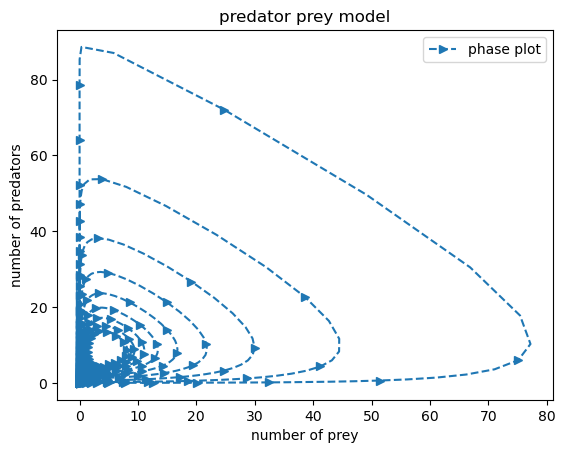

In [46]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

# Lab 12.2

#### E.1 How does timestep affect the solution?
Modify the timestep (or time increment) dt. How does this affect your solutions? Plot both the timeseries and the phase plots. Try making dt 10 times bigger (dt = 0.1) and 10 times smaller. Describe what happens to your results. What happens if you make dt 100 times smaller?

A)Test to change DT to 10 times bigger 

In [121]:
#define conditions
# set time-increment and discretize the time
T  = 15.0                           # final time eg 15 years
dt = 0.1                           # set time-increment rate or steps (time increment)
N  = int(T/dt) + 1                  # number of time-steps 

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [122]:
N

151

In [123]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [124]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)  #for 15 years a time array for plotting
x_euler = u_euler[:,0]    #prey
y_euler = u_euler[:,1]    #predator

Text(0.5, 1.0, 'predator prey model')

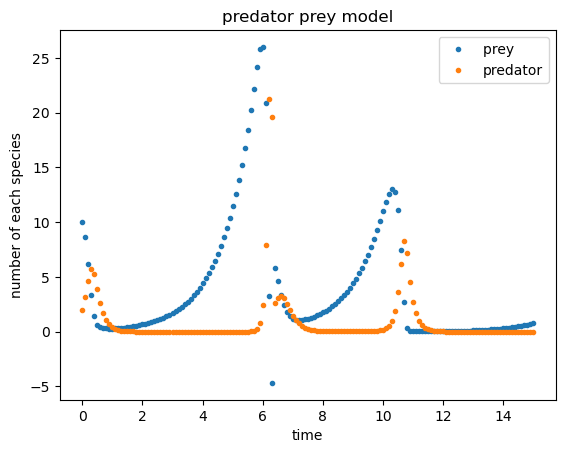

In [125]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

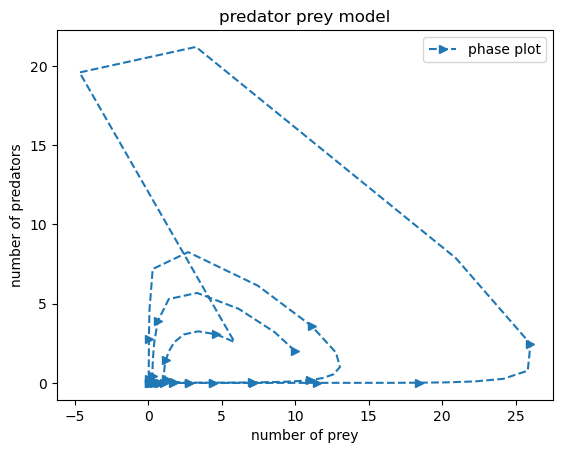

In [126]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

B) Test to change DT to 10 times smaller

In [127]:
#define conditions
# set time-increment and discretize the time
T  = 15.0                           # final time eg 15 years
dt = 0.001                          # set time-increment rate or steps (time increment)
N  = int(T/dt) + 1                  # number of time-steps 

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [128]:
N

15001

In [129]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [130]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)  #for 15 years a time array for plotting
x_euler = u_euler[:,0]    #prey
y_euler = u_euler[:,1]    #predator

Text(0.5, 1.0, 'predator prey model')

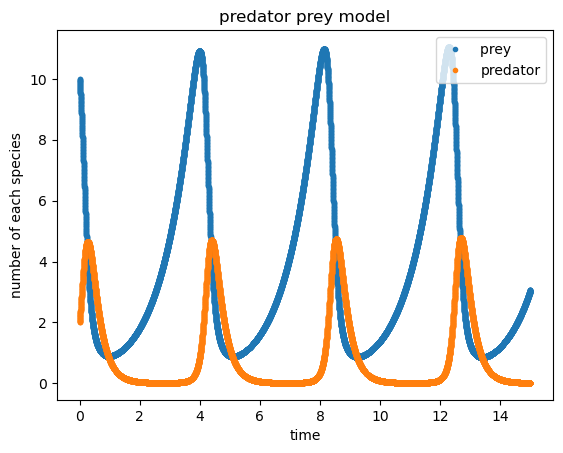

In [131]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

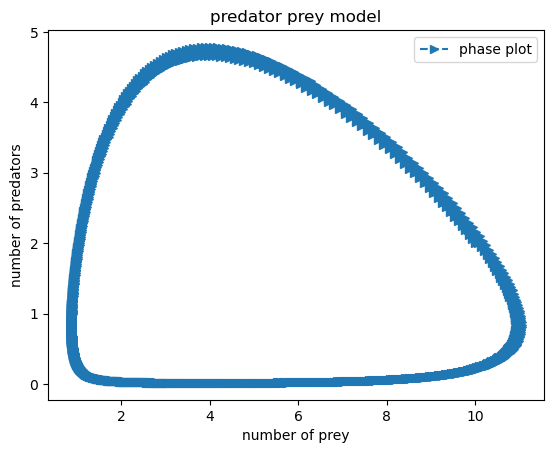

In [132]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

C) 100 times smaller

In [133]:
#define conditions
# set time-increment and discretize the time
T  = 15.0                           # final time eg 15 years
dt = 0.0001                          # set time-increment rate or steps (time increment)
N  = int(T/dt) + 1                  # number of time-steps 

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [134]:
N

150001

In [135]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [136]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)  #for 15 years a time array for plotting
x_euler = u_euler[:,0]    #prey
y_euler = u_euler[:,1]    #predator

Text(0.5, 1.0, 'predator prey model')

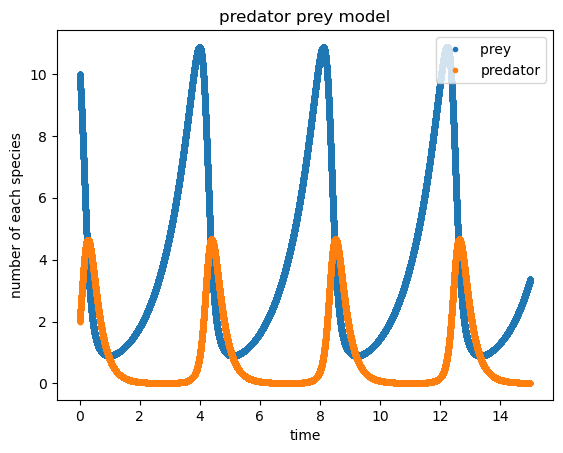

In [137]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

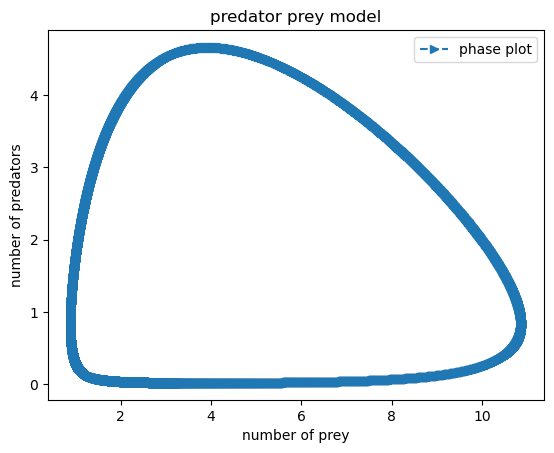

In [138]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

**Answer**:The changes in speed affect the recovery cycle between predator and prey. As the rate increases the number of time steps decreases, which result in a reduction of the cycle leght overtime. On the other hand, by decreasing the rate value, the number of time steps increases which results in constant or steady cycles with higher peaks overtime.

#### E.2 Adding the steady state

The steady state(s) of the system are found by setting the population equations to zero, that is the solution to when the population is not changing. This is also called a "fixed point" of the equations, since if the populations start there they stay there, i.e. are fixed.

Find the steady states of the system using algebra. Plot the fixed point (steady state population) of the system on both the timeseries and phase space plots. Describe where the fixed point is in the phase space plot and plot it. What happens if you start at the steady state? What happens if you start near the steady state?

$\alpha x - \beta x y  = 0$

$\delta x y -\gamma y  = 0$



#solve for x and y given everything else remain constant

y = 0 = alpha/beta

x = 0 = gamma/delta

In [147]:
#set the paramters
alpha = 1.
beta = 1.2
gamma = 4
delta = 1

In [148]:
#Define the function remain the same as before
def euler_step(u, f, dt):
    return u + dt * f(u)

def f(u):
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])


In [149]:
#define the conditions
T = 15.0
dt = 0.01
N = int(T / dt) + 1

#keeping same number of prey and predator from past example
x0 = 10.
y0 = 2.
t0 = 0

#apply the function
u_euler = np.zeros((N, 2))
u_euler[0] = np.array([x0, y0])

for n in range(N - 1):
    u_euler[n + 1] = euler_step(u_euler[n], f, dt)

time = np.linspace(0.0, T, N)
x_euler = u_euler[:, 0]
y_euler = u_euler[:, 1]

In [150]:
#find the steady state
x_st = gamma / delta
y_st = alpha / beta

In [161]:
y_st

0.8333333333333334

In [162]:
x_st

4.0

C:\Users\Mariam Valladares\AppData\Local\Temp\ipykernel_31396\3319382712.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(time, x_st * np.ones(N), 'k--', color = "green", label='Steady State Prey')
C:\Users\Mariam Valladares\AppData\Local\Temp\ipykernel_31396\3319382712.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(time, y_st * np.ones(N), 'k--', color = "blue", label='Steady State Predator')


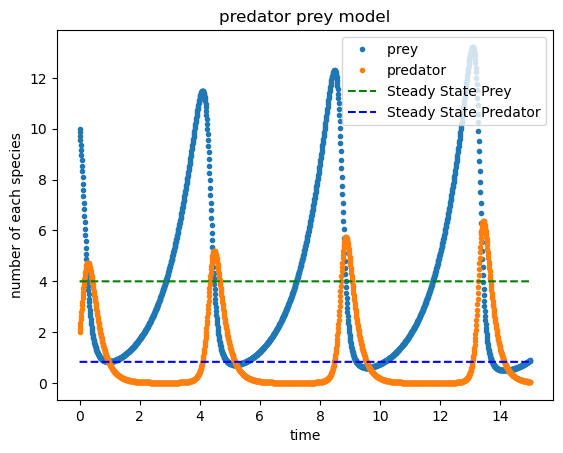

In [157]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.plot(time, x_st * np.ones(N), 'k--', color = "green", label='Steady State Prey')
plt.plot(time, y_st * np.ones(N), 'k--', color = "blue", label='Steady State Predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")
plt.show()

Text(0.5, 1.0, 'predator prey model')

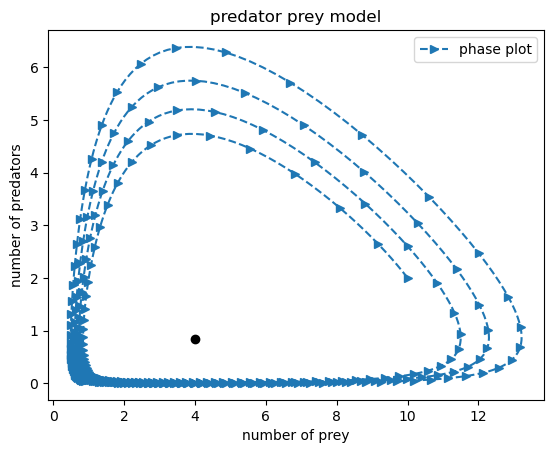

In [158]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(x_st, y_st, 'ko')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")


**Answer**: The steady state for the prey was 4 and the predator was 0.83. If the predator and prey start at those number the system remains the static, does not change as observed in the example below. If the values start near those stady state numbers, the system remains almost the same (the numbers between predator prey remain almost the same with a few small fluctuations.

In [167]:
#set the paramters 
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1

In [175]:
#define the conditions
T = 15.0
dt = 0.01
N = int(T / dt) + 1

#set to start at the steady state
x0 = 4.
y0 = 0.83
t0 = 0

#apply the function
u_euler = np.zeros((N, 2))
u_euler[0] = np.array([x0, y0])

for n in range(N - 1):
    u_euler[n + 1] = euler_step(u_euler[n], f, dt)

time = np.linspace(0.0, T, N)
x_euler = u_euler[:, 0]
y_euler = u_euler[:, 1]

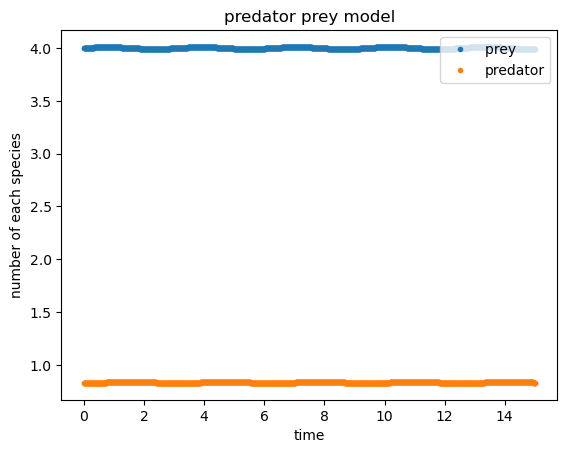

In [176]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")
plt.show()

Text(0.5, 1.0, 'predator prey model')

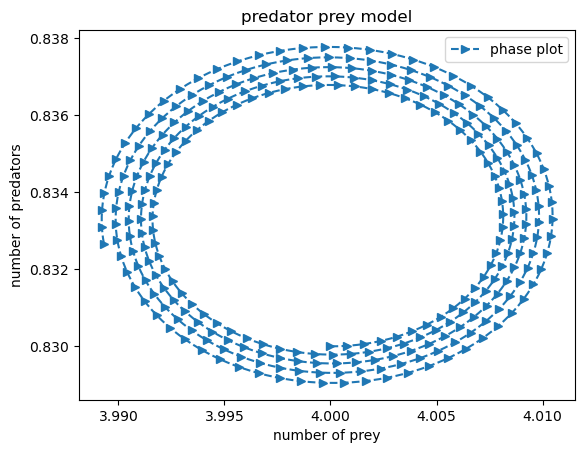

In [177]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")


#### E.3 A better algorithm
Do Exercise 1 again with a fourth order time stepping method called "Runge-Kutta 4" whose algorithm is given below. Do your answers differ? How does the dt, the timestep, affect your answer using this "higher order" algorithm?

In [191]:
#set the paramters 
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1

In [192]:
def f(u):
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])

In [193]:
def RK4(u,f,dt):
    # Runge Kutta 4th order method
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    #calculate slopes
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)

In [194]:
#Test RK4 at initial time increment rate

In [195]:
#define conditions
# set time-increment and discretize the time
T  = 15.0                           # final time eg 15 years
dt = 0.01                           # set time-increment rate or steps (time increment)
N  = int(T/dt) + 1                  # number of time-steps 

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_rk4 = np.zeros((N, 2))

# imput initial conditions
u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

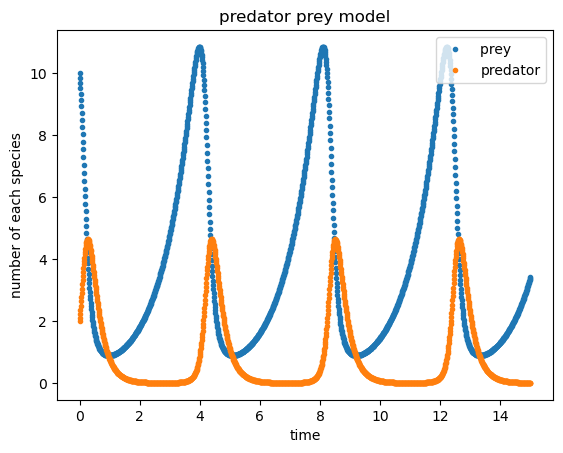

In [196]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")
plt.show()

Text(0.5, 1.0, 'predator prey model')

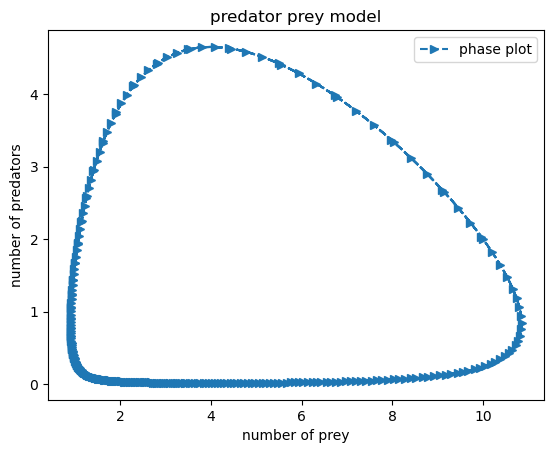

In [197]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [198]:
#10 times bigger
#define conditions
# set time-increment and discretize the time
T  = 15.0                           # final time eg 15 years
dt = 0.1                           # set time-increment rate or steps (time increment)
N  = int(T/dt) + 1                  # number of time-steps 

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_rk4 = np.zeros((N, 2))

# imput initial conditions
u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

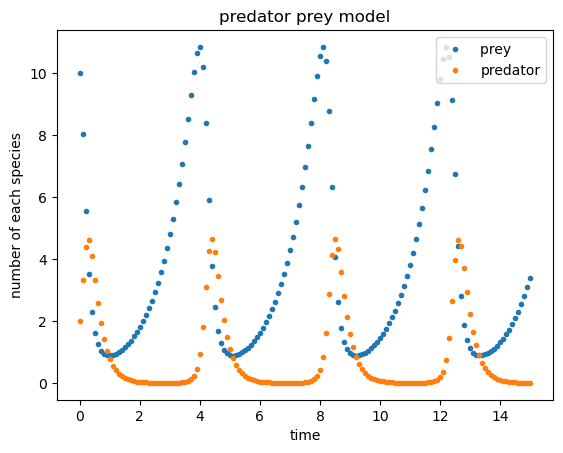

In [199]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")
plt.show()

Text(0.5, 1.0, 'predator prey model')

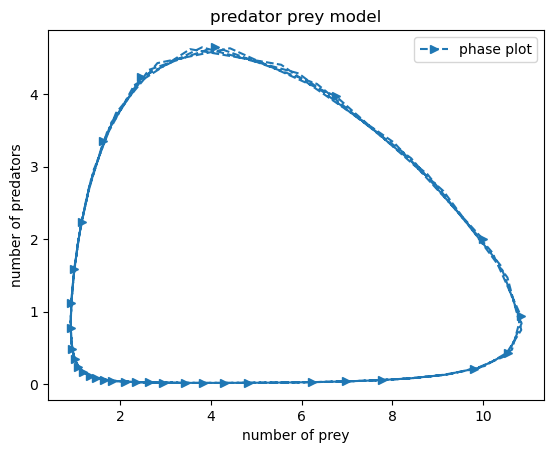

In [200]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [201]:
#10 times smaller
#define conditions
# set time-increment and discretize the time
T  = 15.0                           # final time eg 15 years
dt = 0.001                           # set time-increment rate or steps (time increment)
N  = int(T/dt) + 1                  # number of time-steps 

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_rk4 = np.zeros((N, 2))

# imput initial conditions
u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

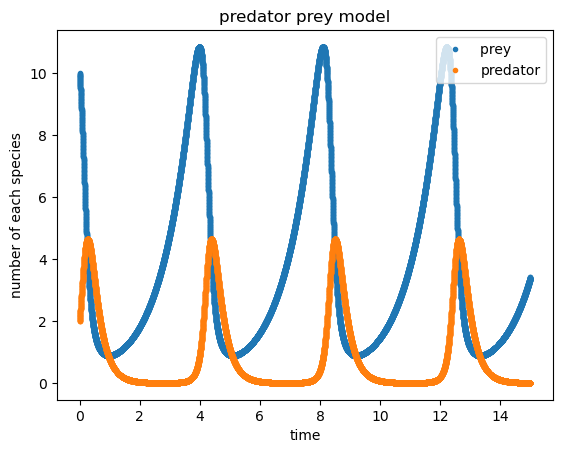

In [202]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")
plt.show()

Text(0.5, 1.0, 'predator prey model')

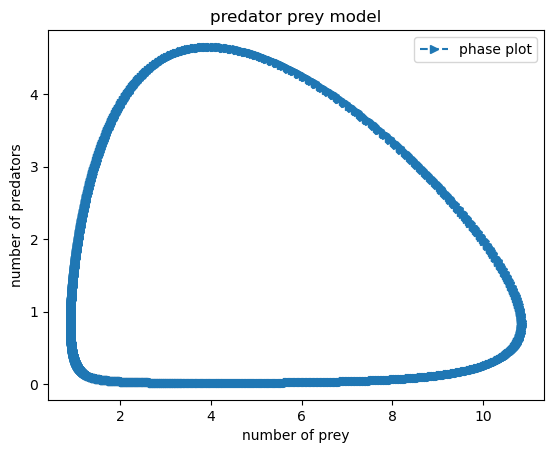

In [203]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [204]:
#100 times smaller
#define conditions
# set time-increment and discretize the time
T  = 15.0                           # final time eg 15 years
dt = 0.0001                           # set time-increment rate or steps (time increment)
N  = int(T/dt) + 1                  # number of time-steps 

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_rk4 = np.zeros((N, 2))

# imput initial conditions
u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

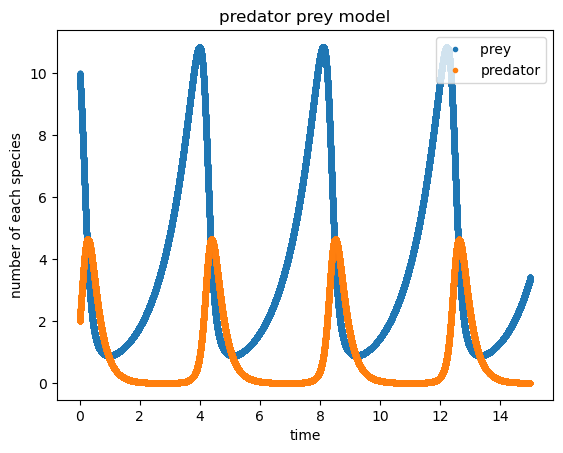

In [205]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")
plt.show()

Text(0.5, 1.0, 'predator prey model')

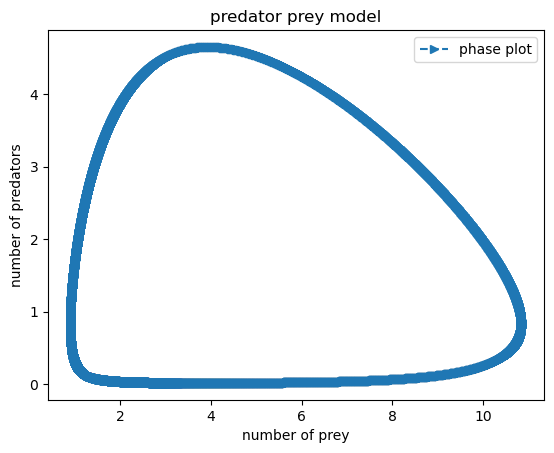

In [206]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

**Answer**: Changes in the dt or time-rate increment result in different prey-predator predictions particularly when the dt value was larger (0.1). Using the rk4 method prey-predator cycles remain at the same interval and peaks, but there is fewer individuals per cycle than when using smaller dt values. However, when using the euler method with bigger dt (0.1) the recovery cycle between predator and prey is lower having a decreasing number over time. Seems like the euler method has higher sensitivity to changes in dt than the rk4 method, where the number of cycles remains almost the same with changes in dt, only varying the number of individuals.

#### E.4 Exploring parameter space
Vary the interactions between species by changing $\alpha, \beta, \gamma, \delta$ and see what happens to the population evolution as well as phase plots. How does changing each parameter individually affect the system?

In [210]:
##Changing alpha
#set the paramters 
alpha = 5.    #previously 1
beta = 1.2
gamma = 4.
delta = 1

In [211]:
def f(u):
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])

In [212]:
#define conditions
# set time-increment and discretize the time
T  = 15.0                           # final time eg 15 years
dt = 0.01                           # set time-increment rate or steps (time increment)
N  = int(T/dt) + 1                  # number of time-steps 

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_rk4 = np.zeros((N, 2))

# imput initial conditions
u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

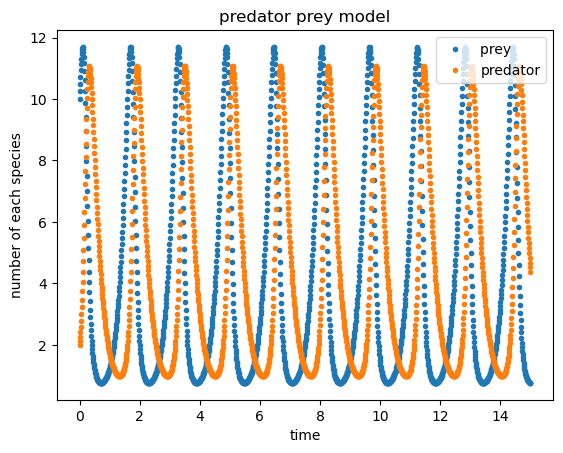

In [213]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")
plt.show()

Text(0.5, 1.0, 'predator prey model')

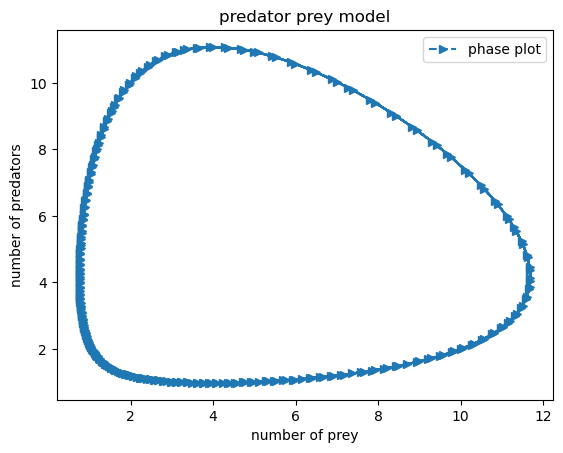

In [214]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [215]:
##Changing beta
#set the paramters 
alpha = 1.    
beta = 5.   #previously 1.2
gamma = 4.
delta = 1

In [216]:
def f(u):
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])

In [217]:
#define conditions
# set time-increment and discretize the time
T  = 15.0                           # final time eg 15 years
dt = 0.01                           # set time-increment rate or steps (time increment)
N  = int(T/dt) + 1                  # number of time-steps 

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_rk4 = np.zeros((N, 2))

# imput initial conditions
u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

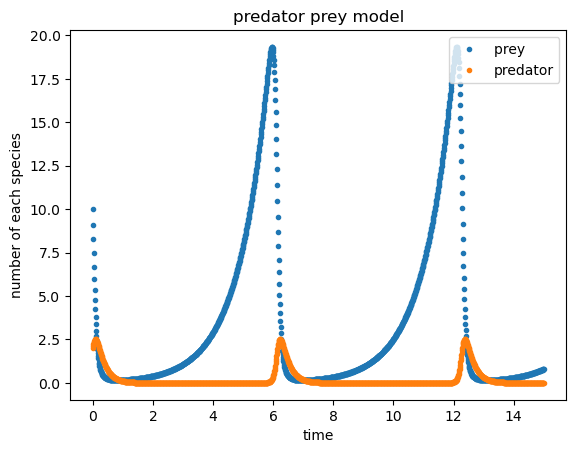

In [218]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")
plt.show()

Text(0.5, 1.0, 'predator prey model')

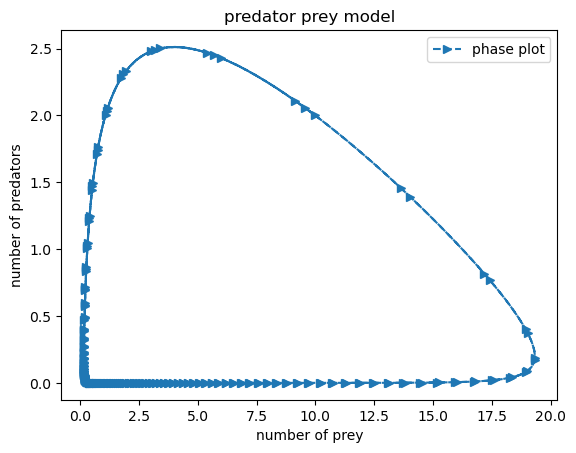

In [219]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [220]:
##Changing gamma
#set the paramters 
alpha = 1.    
beta = 1.2
gamma = 10.   #previously 4
delta = 1

In [221]:
def f(u):
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])

In [222]:
#define conditions
# set time-increment and discretize the time
T  = 15.0                           # final time eg 15 years
dt = 0.01                           # set time-increment rate or steps (time increment)
N  = int(T/dt) + 1                  # number of time-steps 

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_rk4 = np.zeros((N, 2))

# imput initial conditions
u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

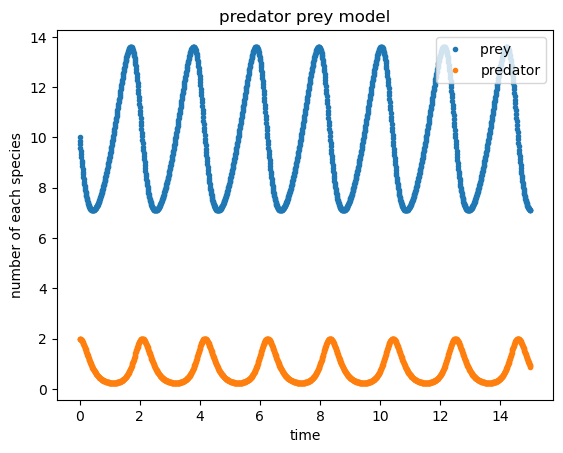

In [223]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")
plt.show()

Text(0.5, 1.0, 'predator prey model')

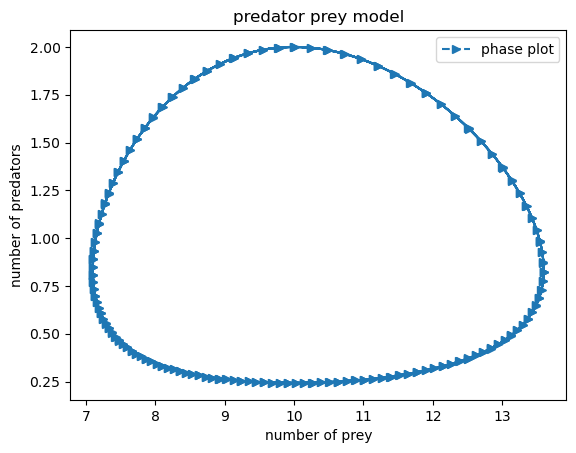

In [224]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [225]:
##Changing delta
#set the paramters 
alpha = 1.    
beta = 1.2
gamma = 4.   
delta = 5   #previously 1

In [226]:
def f(u):
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])

In [227]:
#define conditions
# set time-increment and discretize the time
T  = 15.0                           # final time eg 15 years
dt = 0.01                           # set time-increment rate or steps (time increment)
N  = int(T/dt) + 1                  # number of time-steps 

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

#create the array where the solutions of populations predicted for the prey predator will be saved
# initialize the array containing the solution for each time-step
u_rk4 = np.zeros((N, 2))

# imput initial conditions
u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

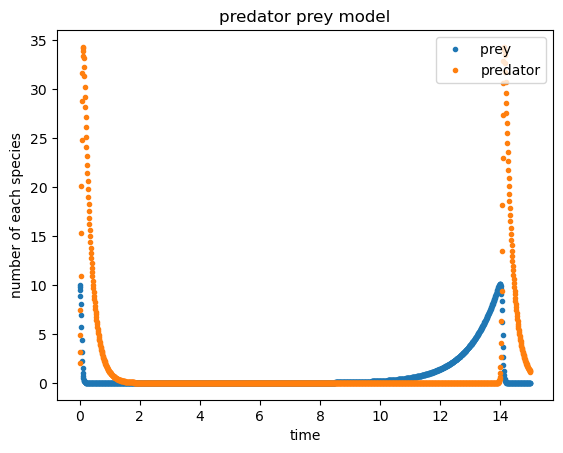

In [228]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")
plt.show()

Text(0.5, 1.0, 'predator prey model')

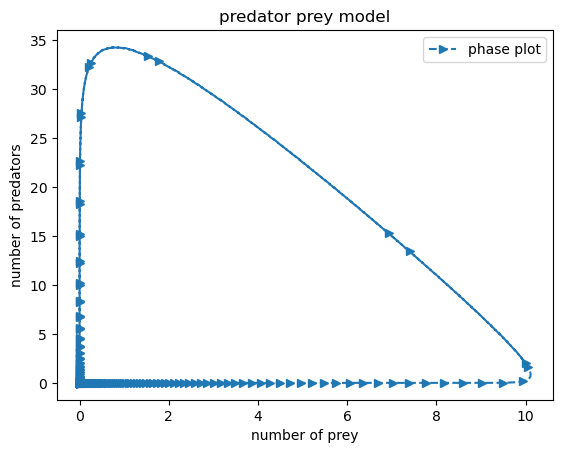

In [229]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

**Answer**: 
1. Increasing the value of alpha reduces the lenght of the cycles, resulting in more short time cycles, with almost similar population peaks for both predator and prey.
2. Increasing the value of beta  extents the cycle of the system, resulting in less cycles and also the number of predator and prey (higher peaks in prey populations than predator).
3. Increasing the value of gamma resulted in a similar parttern as the steady-state where the system remains the same without predator prey interactions.
4. Increasing the value of delta extents the cycle of the system, resulting in fewer cycles and also the number of predator and prey (higher peaks in predator populations than prey).

#### E.5 (Advanced, required for grad students)
Modify the differential equations to include other types of interactions. See advanced predator prey example link at the top for ideas. You might add in a self-eating (i.e. $-ay^2$) term into the predator equation. Or do the zombie apocalypse example linked above.

Doing the Zombie apocalypse example based on a system:

dS/dt = P - BSZ - dS dZ/dt = BSZ + GR - ASZ dR/dt = dS + ASZ - GR

with the following notations:

- S: the number of susceptible victims
- Z: the number of zombies
- R: the number of people "killed"
- P: the population birth rate
- d: the chance of a natural death
- B: the chance the "zombie disease" is transmitted (an alive person becomes a zombie)
- G: the chance a dead person is resurrected into a zombie
- A: the chance a zombie is totally destroyed

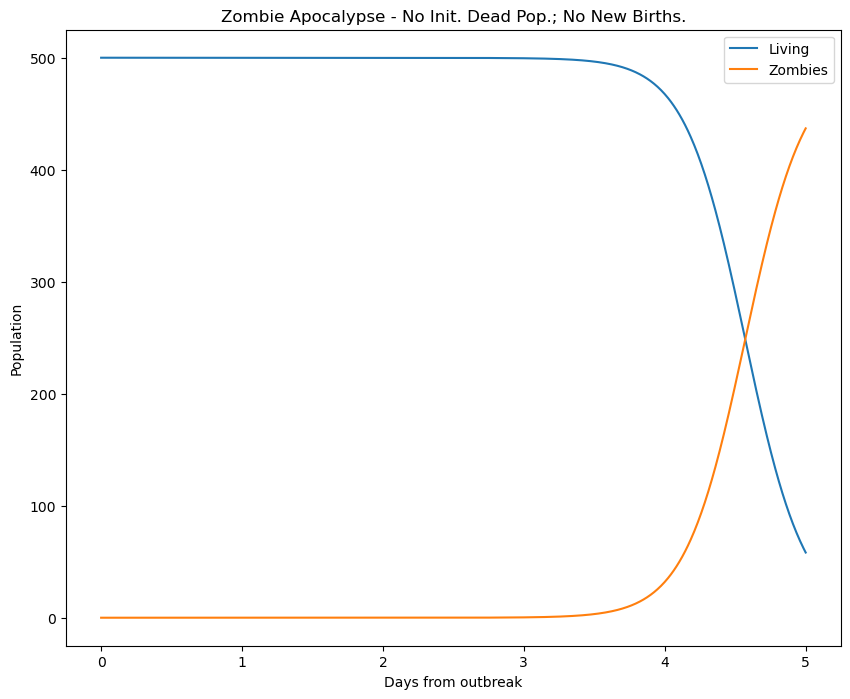

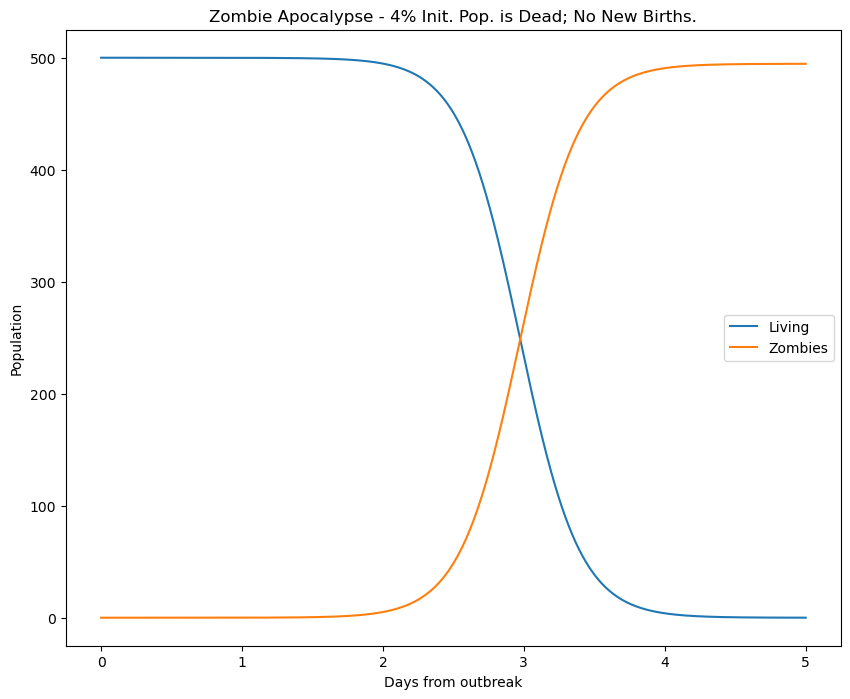

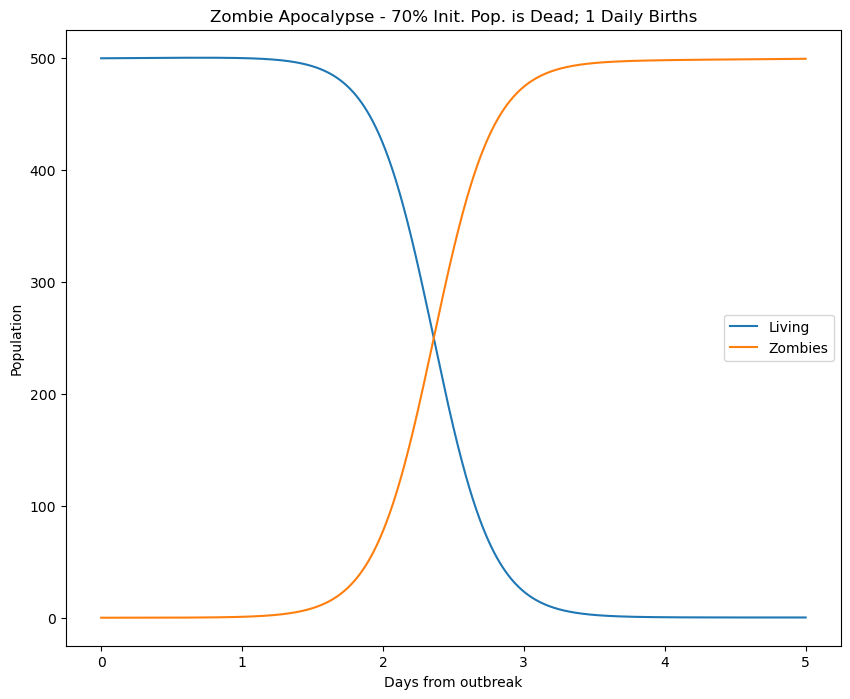

In [238]:
# zombie apocalypse modeling changing the %dead and the number of births
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

P = 0      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)

# solve the system dy/dt = f(y, t)
def f(y, t):
     Si = y[0]
     Zi = y[1]
     Ri = y[2]
     # the model equations (see Munz et al. 2009)
     f0 = P - B*Si*Zi - d*Si
     f1 = B*Si*Zi + G*Ri - A*Si*Zi
     f2 = d*Si + A*Si*Zi - G*Ri
     return [f0, f1, f2]

# initial conditions
S0 = 500.              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial death population
y0 = [S0, Z0, R0]     # initial condition vector
t  = np.linspace(0, 5., 1000)         # time grid

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

# change the initial conditions (different from the example, I increased the dead percent)
R0 = 0.04*S0   # 4% of initial pop is dead
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 4% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)

# change the initial conditions (different from the example, I reduced the births and Increased the dead percent)
R0 = 0.70*S0   # 70% of initial pop is dead
P  = 1.        # 1 new births daily
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 70% Init. Pop. is Dead; 1 Daily Births')
plt.legend(loc=0)